In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Extract Date_of_Journey Datas

In [11]:
def extract_date(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [12]:
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

In [13]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    extract_date(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [16]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2021-05-06 22:20:00 2021-03-22 01:10:00   2h 50m    non-stop   
1 2021-05-06 05:50:00 2021-05-06 13:15:00   7h 25m     2 stops   
2 2021-05-06 09:25:00 2021-06-10 04:25:00      19h     2 stops   
3 2021-05-06 18:05:00 2021-05-06 23:30:00   5h 25m      1 stop   
4 2021-05-06 16:50:00 2021-05-06 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  
0         No info   3897           24              3  
1         No info   7662            5              1  
2         No info  13882            6              9  
3         No info   6218            5             12  
4         No info  13302            3              1

In [17]:
drop_col(train_data,"Date_of_Journey")

In [18]:
train_data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2021-05-06 22:20:00 2021-03-22 01:10:00   2h 50m    non-stop   
1 2021-05-06 05:50:00 2021-05-06 13:15:00   7h 25m     2 stops   
2 2021-05-06 09:25:00 2021-06-10 04:25:00      19h     2 stops   
3 2021-05-06 18:05:00 2021-05-06 23:30:00   5h 25m      1 stop   
4 2021-05-06 16:50:00 2021-05-06 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  
0         No info   3897           24              3  
1         No info   7662            5              1  
2         No info  13882            6              9  
3         No info   6218            5             12  
4         No info  13302            3              1

### Extract Dept_Time Datas

In [19]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [20]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [21]:
extract_hour(train_data,'Dep_Time')

In [22]:
extract_min(train_data, 'Dep_Time')

In [23]:
drop_col(train_data,"Dep_Time")

In [24]:
train_data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

         Arrival_Time Duration Total_Stops Additional_Info  Price  \
0 2021-03-22 01:10:00   2h 50m    non-stop         No info   3897   
1 2021-05-06 13:15:00   7h 25m     2 stops         No info   7662   
2 2021-06-10 04:25:00      19h     2 stops         No info  13882   
3 2021-05-06 23:30:00   5h 25m      1 stop         No info   6218   
4 2021-05-06 21:35:00   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  Dep_Time_hour  Dep_Time_minute  
0           24              3             22               20  
1            5              1              5               50  
2            6              9              9               25  
3            5             12             18                5  
4            3              1             16               50

In [25]:
train_data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
dtype: object

### Extract Arrival_Time Datas

In [26]:
extract_hour(train_data,'Arrival_Time')

extract_min(train_data, 'Arrival_Time')

In [27]:
drop_col(train_data,"Arrival_Time")

In [28]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            5              1   
2     2 stops         No info  13882            6              9   
3      1 stop         No info   6218            5             12   
4      1 stop         No info  13302            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15  
2              9               25                  4                   25  
3             18                5                 23                   30  
4             16               50                 21                   35

### Split Examples

In [29]:
'2h 50m'.split(' ')

['2h', '50m']

In [30]:
'2h 50m'.split(' ')[0]

'2h'

In [31]:
'2h 50m'.split(' ')[1]

'50m'

In [32]:
'2h 50m'.split(' ')[0][0:1]

'2'

In [33]:
duration = list(train_data.Duration)

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [34]:
train_data['Duration']=duration

In [35]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            5              1   
2     2 stops         No info  13882            6              9   
3      1 stop         No info   6218            5             12   
4      1 stop         No info  13302            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15  
2              9               25                  4                   25  
3             18                5                 23                   30  
4             16               50                 21                   35

In [36]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [37]:
def min(x):
    return x.split(' ')[1][0:-1]

In [38]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [39]:
drop_col(train_data,"Duration")

In [40]:
train_data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  Dep_Time_hour  \
0         No info   3897           24              3             22   
1         No info   7662            5              1              5   
2         No info  13882            6              9              9   
3         No info   6218            5             12             18   
4         No info  13302            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute Duration_hours  \
0               20                  1                   10              2   
1               50                 13                   15              7   
2               25                  4                   25             19   
3                5                 23                   30              5   
4               50                 21                   35              4   

  Duration_mins  
0            50  
1            25  
2             0  
3            25  
4            45

In [41]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [42]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [43]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [44]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [45]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data

In [46]:
categorical=train_data[cat_col]
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  
0         No info  
1         No info  
2         No info  
3         No info  
4         No info

## Data Analysis

#### Airline vs Price Analysis

In [47]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

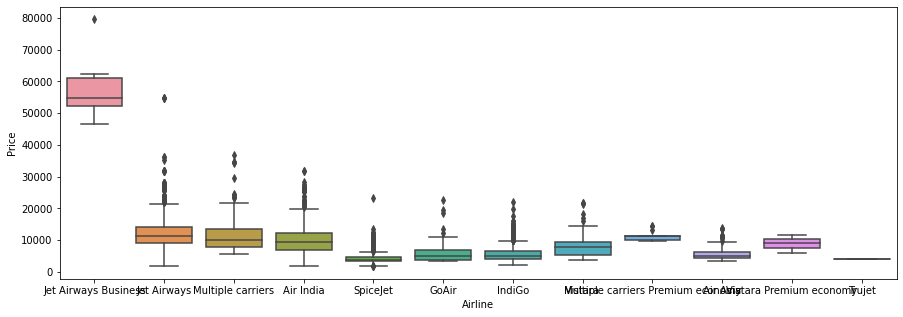

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

#### Perform Total_Stops vs Price Analysis

In [49]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

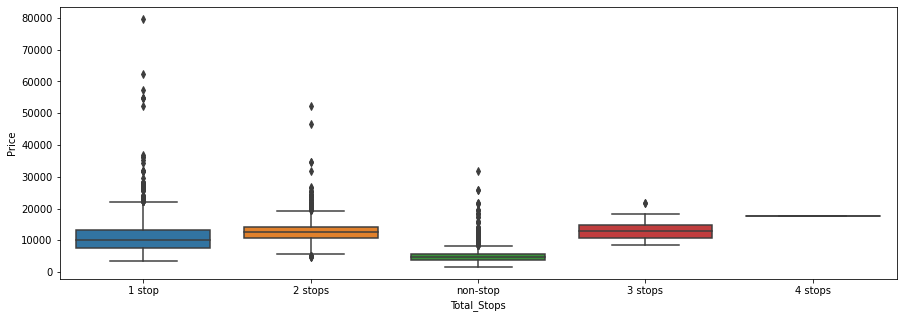

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

#### Source vs Price Analysis

In [51]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

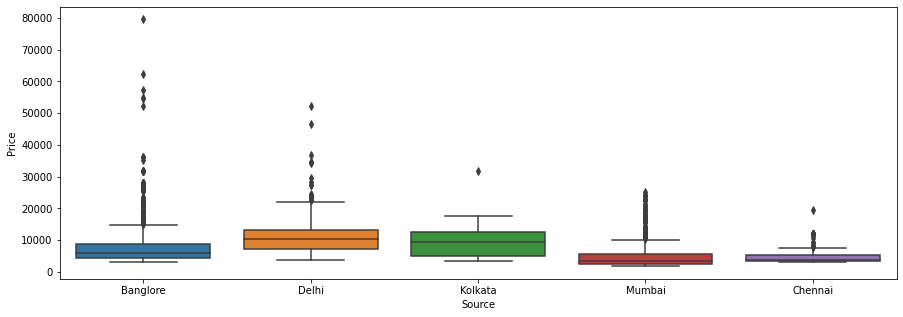

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False))

#### Destination vs Price Analysis

In [53]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

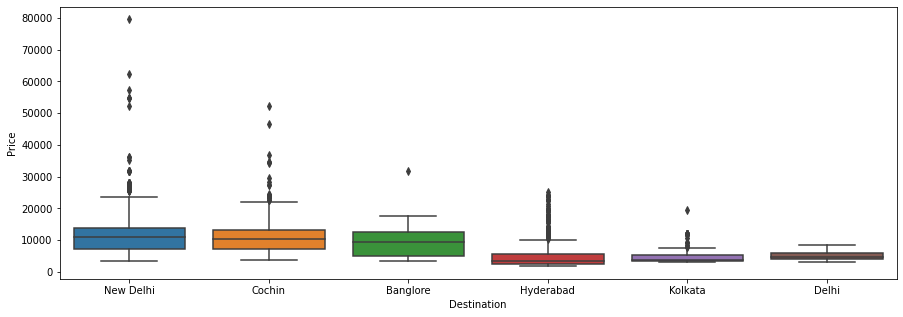

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False))

### One Hot Encoding for Nominal Datas 

In [55]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

In [56]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        1       0
2        0      1        0       0
3        0      0        1       0
4        0      0        0       0

In [57]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1

### Extract Route Data

In [58]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [59]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [61]:
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info Route_1 Route_2 Route_3 Route_4 Route_5  
0         No info    BLR      DEL     NaN     NaN     NaN  
1         No info    CCU     IXR     BBI      BLR     NaN  
2         No info    DEL     LKO     BOM      COK     NaN  
3         No info    CCU     NAG      BLR     NaN     NaN  
4         No info    BLR     NAG      DEL     NaN     NaN

In [62]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [63]:
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info Route_1 Route_2 Route_3 Route_4 Route_5  
0         No info    BLR      DEL    None    None    None  
1         No info    CCU     IXR     BBI      BLR    None  
2         No info    DEL     LKO     BOM      COK    None  
3         No info    CCU     NAG      BLR    None    None  
4         No info    BLR     NAG      DEL    None    None

In [64]:
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



### Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()

In [66]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=lb_encoder.fit_transform(categorical[i])

In [67]:
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Route_1  Route_2  Route_3  Route_4  Route_5  
0         No info        0       13       29       13        5  
1         No info        2       25        1        3        5  
2         No info        3       32        4        5        5  
3         No info        2       34        3       13        5  
4         No info        0       34        8       13        5

In [68]:
drop_col(categorical,"Route")
drop_col(categorical,"Additional_Info")

In [69]:
categorical.head()

Airline    Source Destination Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi    non-stop        0       13       29   
1    Air India   Kolkata    Banglore     2 stops        2       25        1   
2  Jet Airways     Delhi      Cochin     2 stops        3       32        4   
3       IndiGo   Kolkata    Banglore      1 stop        2       34        3   
4       IndiGo  Banglore   New Delhi      1 stop        0       34        8   

   Route_4  Route_5  
0       13        5  
1        3        5  
2        5        5  
3       13        5  
4       13        5

### Extract Total_Stops

In [70]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [71]:
categorical['Total_Stops']=categorical['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [72]:
categorical.head()

Airline    Source Destination  Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi            0        0       13       29   
1    Air India   Kolkata    Banglore            2        2       25        1   
2  Jet Airways     Delhi      Cochin            2        3       32        4   
3       IndiGo   Kolkata    Banglore            1        2       34        3   
4       IndiGo  Banglore   New Delhi            1        0       34        8   

   Route_4  Route_5  
0       13        5  
1        3        5  
2        5        5  
3       13        5  
4       13        5

In [73]:
train_data[cont_col].head()

Price  Journey_day  Journey_month  Dep_Time_hour  Dep_Time_minute  \
0   3897           24              3             22               20   
1   7662            5              1              5               50   
2  13882            6              9              9               25   
3   6218            5             12             18                5   
4  13302            3              1             16               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins  
0                  1                   10               2             50  
1                 13                   15               7             25  
2                  4                   25              19              0  
3                 23                   30               5             25  
4                 21                   35               4             45

In [74]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

Airline    Source Destination  Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi            0        0       13       29   
1    Air India   Kolkata    Banglore            2        2       25        1   
2  Jet Airways     Delhi      Cochin            2        3       32        4   
3       IndiGo   Kolkata    Banglore            1        2       34        3   
4       IndiGo  Banglore   New Delhi            1        0       34        8   

   Route_4  Route_5  Air India  ...  New Delhi  Price  Journey_day  \
0       13        5          0  ...          1   3897           24   
1        3        5          1  ...          0   7662            5   
2        5        5          0  ...          0  13882            6   
3       13        5          0  ...          0   6218            5   
4       13        5          0  ...          1  13302            3   

   Journey_month  Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  \
0              3             22               20                  1   
1              1              5               50                 13   
2              9              9               25                  4   
3             12             18                5                 23   
4              1             16               50                 21   

   Arrival_Time_minute  Duration_hours  Duration_mins  
0                   10               2             50  
1                   15               7             25  
2                   25              19              0  
3                   30               5             25  
4                   35               4             45  

[5 rows x 38 columns]

In [75]:
#drop_col function
drop_col(data_train,'Airline')
drop_col(data_train,'Source')
drop_col(data_train,'Destination')

### data_train EDA

In [76]:
data_train.head()

Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  GoAir  \
0            0        0       13       29       13        5          0      0   
1            2        2       25        1        3        5          1      0   
2            2        3       32        4        5        5          0      0   
3            1        2       34        3       13        5          0      0   
4            1        0       34        8       13        5          0      0   

   IndiGo  Jet Airways  ...  New Delhi  Price  Journey_day  Journey_month  \
0       1            0  ...          1   3897           24              3   
1       0            0  ...          0   7662            5              1   
2       0            1  ...          0  13882            6              9   
3       1            0  ...          0   6218            5             12   
4       1            0  ...          1  13302            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
0             22               20                  1                   10   
1              5               50                 13                   15   
2              9               25                  4                   25   
3             18                5                 23                   30   
4             16               50                 21                   35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45  

[5 rows x 35 columns]

In [77]:
data_train.shape

(10682, 35)

In [78]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [79]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Route_1                            10682 non-null  int32
 2   Route_2                            10682 non-null  int32
 3   Route_3                            10682 non-null  int32
 4   Route_4                            10682 non-null  int32
 5   Route_5                            10682 non-null  int32
 6   Air India                          10682 non-null  uint8
 7   GoAir                              10682 non-null  uint8
 8   IndiGo                             10682 non-null  uint8
 9   Jet Airways                        10682 non-null  uint8
 10  Jet Airways Business               10682 non-null  uint8
 11  Multiple carriers                  10682 non-null  uint8
 12  Multiple carriers 

### Feature Selection

In [80]:
abs(data_train.corr()['Price'].sort_values(ascending=False))

Price                                1.000000
Total_Stops                          0.603897
Duration_hours                       0.508778
Jet Airways                          0.416124
Delhi                                0.270676
Cochin                               0.270676
Jet Airways Business                 0.253303
New Delhi                            0.189777
Route_1                              0.182169
Multiple carriers                    0.139793
Air India                            0.050432
Arrival_Time_hour                    0.024244
Multiple carriers Premium economy    0.017650
Journey_month                        0.010705
Kolkata                              0.009358
Dep_Time_hour                        0.006799
Vistara Premium economy              0.000454
Trujet                               0.010381
Dep_Time_minute                      0.024458
Route_5                              0.055641
Vistara                              0.060654
Arrival_Time_minute               

#### Outlier Detection

In [81]:
def plot(df,col):
    plt.figure(figsize=(30,20))
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

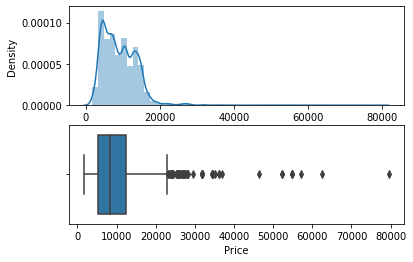

In [82]:
plot(data_train,'Price')

In [83]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

<Figure size 2160x1440 with 0 Axes>

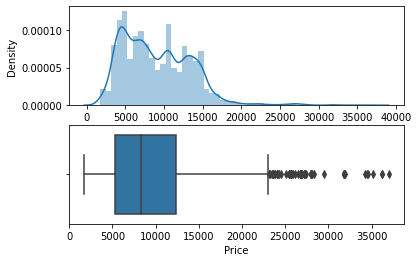

In [84]:
plot(data_train,'Price')

In [85]:
data_train.describe()

Total_Stops       Route_1       Route_2       Route_3       Route_4  \
count  10682.000000  10682.000000  10682.000000  10682.000000  10682.000000   
mean       0.824190      2.019378     11.897959     13.232166     11.792080   
std        0.675229      1.206239      8.006427     11.302632      2.948124   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      7.000000      4.000000     13.000000   
50%        1.000000      2.000000      8.000000      6.000000     13.000000   
75%        1.000000      3.000000     14.000000     29.000000     13.000000   
max        4.000000      4.000000     44.000000     29.000000     13.000000   

            Route_5     Air India         GoAir        IndiGo   Jet Airways  \
count  10682.000000  10682.000000  10682.000000  10682.000000  10682.000000   
mean       4.983056      0.163921      0.018161      0.192192      0.360326   
std        0.263913      0.370221      0.133541      0.394042      0.480117   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.000000      0.000000      0.000000      0.000000      0.000000   
75%        5.000000      0.000000      0.000000      0.000000      1.000000   
max        5.000000      1.000000      1.000000      1.000000      1.000000   

       ...     New Delhi         Price   Journey_day  Journey_month  \
count  ...  10682.000000  10682.000000  10682.000000   10682.000000   
mean   ...      0.087250   9046.090994     12.682925       5.534731   
std    ...      0.282214   4387.489557      8.803800       2.987626   
min    ...      0.000000   1759.000000      3.000000       1.000000   
25%    ...      0.000000   5277.000000      5.000000       3.000000   
50%    ...      0.000000   8372.000000      6.000000       5.000000   
75%    ...      0.000000  12373.000000     21.000000       6.000000   
max    ...      1.000000  36983.000000     27.000000      12.000000   

       Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
count   10682.000000     10682.000000       10682.000000         10682.000000   
mean       12.491013        24.409287          13.349186            24.690601   
std         5.748820        18.767801           6.859317            16.506808   
min         0.000000         0.000000           0.000000             0.000000   
25%         8.000000         5.000000           8.000000            10.000000   
50%        11.000000        25.000000          14.000000            25.000000   
75%        18.000000        40.000000          19.000000            35.000000   
max        23.000000        55.000000          23.000000            55.000000   

       Duration_hours  Duration_mins  
count    10682.000000   10682.000000  
mean        10.244898      28.326624  
std          8.494916      16.945817  
min          0.000000       0.000000  
25%          2.000000      15.000000  
50%          8.000000      30.000000  
75%         15.000000      45.000000  
max         47.000000      55.000000  

[8 rows x 35 columns]

### Machine Learning

#### Setup

In [86]:
X=data_train.drop('Price',axis=1)
X.head()

Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  GoAir  \
0            0        0       13       29       13        5          0      0   
1            2        2       25        1        3        5          1      0   
2            2        3       32        4        5        5          0      0   
3            1        2       34        3       13        5          0      0   
4            1        0       34        8       13        5          0      0   

   IndiGo  Jet Airways  ...  Kolkata  New Delhi  Journey_day  Journey_month  \
0       1            0  ...        0          1           24              3   
1       0            0  ...        0          0            5              1   
2       0            1  ...        0          0            6              9   
3       1            0  ...        0          0            5             12   
4       1            0  ...        0          1            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
0             22               20                  1                   10   
1              5               50                 13                   15   
2              9               25                  4                   25   
3             18                5                 23                   30   
4             16               50                 21                   35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45  

[5 rows x 34 columns]

In [87]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [88]:
y=data_train['Price'] #target
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [89]:
y.isnull().sum()

0

### Split dataset into train & test

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [91]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [92]:
#Libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso 
from sklearn.tree import ExtraTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

def algo_test(X,y):
    L = LinearRegression() 
    E = ElasticNet() 
    R = Ridge() 
    Lass = Lasso() 
    ETR = ExtraTreeRegressor() 
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()

    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=13)

    algos = [L,E, R, Lass, ETR, GBR, XGBC] 
    algo_names = ['Linear', 'Elasticnet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGradientBooting'] 
    r_squared = [] 
    rmse = [] 
    mae = []

    result = pd. DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                       index = algo_names)

    #result.index.name = 'Algorithms

    for algo in algos:
        algo.fit(X_train,y_train) 
        algo.predict(X_test)
        r_squared.append(r2_score(y_test, algo.predict(X_test))) 
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))** .5) 
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))

    result.R_Squared = r_squared 
    result.RMSE = rmse 
    result.MAE = mae

    return result.sort_values('R_Squared',ascending = False)

In [93]:
algo_test(X_train, y_train)

R_Squared         RMSE          MAE
XGradientBooting    0.860264  1636.521796  1094.301362
Gradient Boosting   0.801643  1949.809236  1436.858428
Extra Tree          0.733576  2259.722757  1338.590550
Lasso               0.626905  2674.102957  1902.876817
Ridge               0.626733  2674.718798  1903.479876
Linear              0.626537  2675.420049  1904.614011
Elasticnet          0.554450  2922.241900  2106.467387

In [94]:
XGBC = XGBRegressor()
model = XGBC.fit(X_train, y_train)

In [95]:
print('Training score : {}'.format(model.score(X_train,y_train)))

Training score : 0.9308768478167004


In [96]:
y_pred = model.predict(X_test)

In [97]:
(mean_squared_error(y_test,y_pred)) ** 0.5

1564.9261658735559

In [98]:
r2_score(y_test, y_pred) * 100

print('Prediction score : {}'.format(r2_score(y_test, y_pred) * 100))

Prediction score : 87.0386444637273


In [99]:
import pickle
file=open('pred_model.pkl','wb')
pickle.dump(model,file)